<a href="https://colab.research.google.com/github/oemuaghwor/awesome-open-geoscience/blob/master/Emuaghworie_Ogheneruru__oemuaghwor__Bremen_Big_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as smd
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import math
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
# from google.colab import drive
from oauth2client.client import GoogleCredentials


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
!pip install pydrive

#bremen big data challenge


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
print(os.listdir())

['.config', 'drive', 'sample_data']


In [0]:
#files.download('Ruru3.csv')

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [0]:
#the path of the label file
label_path ="/gdrive/My Drive/bbdc_2020/train/labels.train.csv"

In [0]:
# reading the labeled file
label_data =pd.read_csv(label_path, header =None)
label_data

,0,1,2,3
0,s01t01.la,0.000,7.370,la-nothing
1,s01t01.la,7.370,9.420,la-object-pick
2,s01t01.la,9.420,9.430,la-nothing
3,s01t01.la,9.430,11.430,la-object-pick
4,s01t01.la,11.430,12.930,la-object-switch-hands
...,...,...,...,...
2483,s05t06.ra,167.383,167.389,ra-nothing
2484,s05t06.ra,167.389,169.098,ra-object-pick
2485,s05t06.ra,169.098,171.109,ra-object-carry
2486,s05t06.ra,171.109,172.813,ra-object-place


In [0]:
len(label_data)

2488

In [0]:
# list of the sensor names, on the left part of the body for moc sensor
left_sensors = ['ts','Hip_Rotation_X',
 'Hip_Rotation_Y',
 'Hip_Rotation_Z',
 'Hip_Rotation_W',
 'Hip_Position_X',
 'Hip_Position_Y',
 'Hip_Position_Z',
 'Ab_Rotation_X',
 'Ab_Rotation_Y',
 'Ab_Rotation_Z',
 'Ab_Rotation_W',
 'Ab_Position_X',
 'Ab_Position_Y',
 'Ab_Position_Z',
 'Chest_Rotation_X',
 'Chest_Rotation_Y',
 'Chest_Rotation_Z',
 'Chest_Rotation_W',
 'Chest_Position_X',
 'Chest_Position_Y',
 'Chest_Position_Z',
 'Neck_Rotation_X',
 'Neck_Rotation_Y',
 'Neck_Rotation_Z',
 'Neck_Rotation_W',
 'Neck_Position_X',
 'Neck_Position_Y',
 'Neck_Position_Z',
 'Head_Rotation_X',
 'Head_Rotation_Y',
 'Head_Rotation_Z',
 'Head_Rotation_W',
 'Head_Position_X',
 'Head_Position_Y',
 'Head_Position_Z',
 'LShoulder_Rotation_X',
 'LShoulder_Rotation_Y',
 'LShoulder_Rotation_Z',
 'LShoulder_Rotation_W',
 'LShoulder_Position_X',
 'LShoulder_Position_Y',
 'LShoulder_Position_Z',
 'LUArm_Rotation_X',
 'LUArm_Rotation_Y',
 'LUArm_Rotation_Z',
 'LUArm_Rotation_W',
 'LUArm_Position_X',
 'LUArm_Position_Y',
 'LUArm_Position_Z',
 'LFArm_Rotation_X',
 'LFArm_Rotation_Y',
 'LFArm_Rotation_Z',
 'LFArm_Rotation_W',
 'LFArm_Position_X',
 'LFArm_Position_Y',
 'LFArm_Position_Z',
 'LHand_Rotation_X',
 'LHand_Rotation_Y',
 'LHand_Rotation_Z',
 'LHand_Rotation_W',
 'LHand_Position_X',
 'LHand_Position_Y',
 'LHand_Position_Z',
 'LThigh_Rotation_X',
 'LThigh_Rotation_Y',
 'LThigh_Rotation_Z',
 'LThigh_Rotation_W',
 'LThigh_Position_X',
 'LThigh_Position_Y',
 'LThigh_Position_Z',
 'LShin_Rotation_X',
 'LShin_Rotation_Y',
 'LShin_Rotation_Z',
 'LShin_Rotation_W',
 'LShin_Position_X',
 'LShin_Position_Y',
 'LShin_Position_Z',
 'LFoot_Rotation_X',
 'LFoot_Rotation_Y',
 'LFoot_Rotation_Z',
 'LFoot_Rotation_W',
 'LFoot_Position_X',
 'LFoot_Position_Y',
 'LFoot_Position_Z',
 'LToe_Rotation_X',
 'LToe_Rotation_Y',
 'LToe_Rotation_Z',
 'LToe_Rotation_W',
 'LToe_Position_X',
 'LToe_Position_Y',
 'LToe_Position_Z',
 'LThumb1_Rotation_X',
 'LThumb1_Rotation_Y',
 'LThumb1_Rotation_Z',
 'LThumb1_Rotation_W',
 'LThumb1_Position_X',
 'LThumb1_Position_Y',
 'LThumb1_Position_Z',
 'LThumb2_Rotation_X',
 'LThumb2_Rotation_Y',
 'LThumb2_Rotation_Z',
 'LThumb2_Rotation_W',
 'LThumb2_Position_X',
 'LThumb2_Position_Y',
 'LThumb2_Position_Z',
 'LThumb3_Rotation_X',
 'LThumb3_Rotation_Y',
 'LThumb3_Rotation_Z',
 'LThumb3_Rotation_W',
 'LThumb3_Position_X',
 'LThumb3_Position_Y',
 'LThumb3_Position_Z',
 'LIndex1_Rotation_X',
 'LIndex1_Rotation_Y',
 'LIndex1_Rotation_Z',
 'LIndex1_Rotation_W',
 'LIndex1_Position_X',
 'LIndex1_Position_Y',
 'LIndex1_Position_Z',
 'LIndex2_Rotation_X',
 'LIndex2_Rotation_Y',
 'LIndex2_Rotation_Z',
 'LIndex2_Rotation_W',
 'LIndex2_Position_X',
 'LIndex2_Position_Y',
 'LIndex2_Position_Z',
 'LIndex3_Rotation_X',
 'LIndex3_Rotation_Y',
 'LIndex3_Rotation_Z',
 'LIndex3_Rotation_W',
 'LIndex3_Position_X',
 'LIndex3_Position_Y',
 'LIndex3_Position_Z',
 'LMiddle1_Rotation_X',
 'LMiddle1_Rotation_Y',
 'LMiddle1_Rotation_Z',
 'LMiddle1_Rotation_W',
 'LMiddle1_Position_X',
 'LMiddle1_Position_Y',
 'LMiddle1_Position_Z',
 'LMiddle2_Rotation_X',
 'LMiddle2_Rotation_Y',
 'LMiddle2_Rotation_Z',
 'LMiddle2_Rotation_W',
 'LMiddle2_Position_X',
 'LMiddle2_Position_Y',
 'LMiddle2_Position_Z',
 'LMiddle3_Rotation_X',
 'LMiddle3_Rotation_Y',
 'LMiddle3_Rotation_Z',
 'LMiddle3_Rotation_W',
 'LMiddle3_Position_X',
 'LMiddle3_Position_Y',
 'LMiddle3_Position_Z',
 'LRing1_Rotation_X',
 'LRing1_Rotation_Y',
 'LRing1_Rotation_Z',
 'LRing1_Rotation_W',
 'LRing1_Position_X',
 'LRing1_Position_Y',
 'LRing1_Position_Z',
 'LRing2_Rotation_X',
 'LRing2_Rotation_Y',
 'LRing2_Rotation_Z',
 'LRing2_Rotation_W',
 'LRing2_Position_X',
 'LRing2_Position_Y',
 'LRing2_Position_Z',
 'LRing3_Rotation_X',
 'LRing3_Rotation_Y',
 'LRing3_Rotation_Z',
 'LRing3_Rotation_W',
 'LRing3_Position_X',
 'LRing3_Position_Y',
 'LRing3_Position_Z',
 'LPinky1_Rotation_X',
 'LPinky1_Rotation_Y',
 'LPinky1_Rotation_Z',
 'LPinky1_Rotation_W',
 'LPinky1_Position_X',
 'LPinky1_Position_Y',
 'LPinky1_Position_Z',
 'LPinky2_Rotation_X',
 'LPinky2_Rotation_Y',
 'LPinky2_Rotation_Z',
 'LPinky2_Rotation_W',
 'LPinky2_Position_X',
 'LPinky2_Position_Y',
 'LPinky2_Position_Z',
 'LPinky3_Rotation_X',
 'LPinky3_Rotation_Y',
 'LPinky3_Rotation_Z',
 'LPinky3_Rotation_W',
 'LPinky3_Position_X',
 'LPinky3_Position_Y',
 'LPinky3_Position_Z',]

In [0]:
# list of the sensor names, on the right part of the body for moc sensor
right_sensors =['ts','Hip_Rotation_X',
 'Hip_Rotation_Y',
 'Hip_Rotation_Z',
 'Hip_Rotation_W',
 'Hip_Position_X',
 'Hip_Position_Y',
 'Hip_Position_Z',
 'Ab_Rotation_X',
 'Ab_Rotation_Y',
 'Ab_Rotation_Z',
 'Ab_Rotation_W',
 'Ab_Position_X',
 'Ab_Position_Y',
 'Ab_Position_Z',
 'Chest_Rotation_X',
 'Chest_Rotation_Y',
 'Chest_Rotation_Z',
 'Chest_Rotation_W',
 'Chest_Position_X',
 'Chest_Position_Y',
 'Chest_Position_Z',
 'Neck_Rotation_X',
 'Neck_Rotation_Y',
 'Neck_Rotation_Z',
 'Neck_Rotation_W',
 'Neck_Position_X',
 'Neck_Position_Y',
 'Neck_Position_Z',
 'Head_Rotation_X',
 'Head_Rotation_Y',
 'Head_Rotation_Z',
 'Head_Rotation_W',
 'Head_Position_X',
 'Head_Position_Y',
 'Head_Position_Z',
  'RShoulder_Rotation_X',
 'RShoulder_Rotation_Y',
 'RShoulder_Rotation_Z',
 'RShoulder_Rotation_W',
 'RShoulder_Position_X',
 'RShoulder_Position_Y',
 'RShoulder_Position_Z',
 'RUArm_Rotation_X',
 'RUArm_Rotation_Y',
 'RUArm_Rotation_Z',
 'RUArm_Rotation_W',
 'RUArm_Position_X',
 'RUArm_Position_Y',
 'RUArm_Position_Z',
 'RFArm_Rotation_X',
 'RFArm_Rotation_Y',
 'RFArm_Rotation_Z',
 'RFArm_Rotation_W',
 'RFArm_Position_X',
 'RFArm_Position_Y',
 'RFArm_Position_Z',
 'RHand_Rotation_X',
 'RHand_Rotation_Y',
 'RHand_Rotation_Z',
 'RHand_Rotation_W',
 'RHand_Position_X',
 'RHand_Position_Y',
 'RHand_Position_Z',
 'RThigh_Rotation_X',
 'RThigh_Rotation_Y',
 'RThigh_Rotation_Z',
 'RThigh_Rotation_W',
 'RThigh_Position_X',
 'RThigh_Position_Y',
 'RThigh_Position_Z',
 'RShin_Rotation_X',
 'RShin_Rotation_Y',
 'RShin_Rotation_Z',
 'RShin_Rotation_W',
 'RShin_Position_X',
 'RShin_Position_Y',
 'RShin_Position_Z',
 'RFoot_Rotation_X',
 'RFoot_Rotation_Y',
 'RFoot_Rotation_Z',
 'RFoot_Rotation_W',
 'RFoot_Position_X',
 'RFoot_Position_Y',
 'RFoot_Position_Z',
 'RToe_Rotation_X',
 'RToe_Rotation_Y',
 'RToe_Rotation_Z',
 'RToe_Rotation_W',
 'RToe_Position_X',
 'RToe_Position_Y',
 'RToe_Position_Z',
 'RThumb1_Rotation_X',
 'RThumb1_Rotation_Y',
 'RThumb1_Rotation_Z',
 'RThumb1_Rotation_W',
 'RThumb1_Position_X',
 'RThumb1_Position_Y',
 'RThumb1_Position_Z',
 'RThumb2_Rotation_X',
 'RThumb2_Rotation_Y',
 'RThumb2_Rotation_Z',
 'RThumb2_Rotation_W',
 'RThumb2_Position_X',
 'RThumb2_Position_Y',
 'RThumb2_Position_Z',
 'RThumb3_Rotation_X',
 'RThumb3_Rotation_Y',
 'RThumb3_Rotation_Z',
 'RThumb3_Rotation_W',
 'RThumb3_Position_X',
 'RThumb3_Position_Y',
 'RThumb3_Position_Z',
 'RIndex1_Rotation_X',
 'RIndex1_Rotation_Y',
 'RIndex1_Rotation_Z',
 'RIndex1_Rotation_W',
 'RIndex1_Position_X',
 'RIndex1_Position_Y',
 'RIndex1_Position_Z',
 'RIndex2_Rotation_X',
 'RIndex2_Rotation_Y',
 'RIndex2_Rotation_Z',
 'RIndex2_Rotation_W',
 'RIndex2_Position_X',
 'RIndex2_Position_Y',
 'RIndex2_Position_Z',
 'RIndex3_Rotation_X',
 'RIndex3_Rotation_Y',
 'RIndex3_Rotation_Z',
 'RIndex3_Rotation_W',
 'RIndex3_Position_X',
 'RIndex3_Position_Y',
 'RIndex3_Position_Z',
 'RMiddle1_Rotation_X',
 'RMiddle1_Rotation_Y',
 'RMiddle1_Rotation_Z',
 'RMiddle1_Rotation_W',
 'RMiddle1_Position_X',
 'RMiddle1_Position_Y',
 'RMiddle1_Position_Z',
 'RMiddle2_Rotation_X',
 'RMiddle2_Rotation_Y',
 'RMiddle2_Rotation_Z',
 'RMiddle2_Rotation_W',
 'RMiddle2_Position_X',
 'RMiddle2_Position_Y',
 'RMiddle2_Position_Z',
 'RMiddle3_Rotation_X',
 'RMiddle3_Rotation_Y',
 'RMiddle3_Rotation_Z',
 'RMiddle3_Rotation_W',
 'RMiddle3_Position_X',
 'RMiddle3_Position_Y',
 'RMiddle3_Position_Z',
 'RRing1_Rotation_X',
 'RRing1_Rotation_Y',
 'RRing1_Rotation_Z',
 'RRing1_Rotation_W',
 'RRing1_Position_X',
 'RRing1_Position_Y',
 'RRing1_Position_Z',
 'RRing2_Rotation_X',
 'RRing2_Rotation_Y',
 'RRing2_Rotation_Z',
 'RRing2_Rotation_W',
 'RRing2_Position_X',
 'RRing2_Position_Y',
 'RRing2_Position_Z',
 'RRing3_Rotation_X',
 'RRing3_Rotation_Y',
 'RRing3_Rotation_Z',
 'RRing3_Rotation_W',
 'RRing3_Position_X',
 'RRing3_Position_Y',
 'RRing3_Position_Z',
 'RPinky1_Rotation_X',
 'RPinky1_Rotation_Y',
 'RPinky1_Rotation_Z',
 'RPinky1_Rotation_W',
 'RPinky1_Position_X',
 'RPinky1_Position_Y',
 'RPinky1_Position_Z',
 'RPinky2_Rotation_X',
 'RPinky2_Rotation_Y',
 'RPinky2_Rotation_Z',
 'RPinky2_Rotation_W',
 'RPinky2_Position_X',
 'RPinky2_Position_Y',
 'RPinky2_Position_Z',
 'RPinky3_Rotation_X',
 'RPinky3_Rotation_Y',
 'RPinky3_Rotation_Z',
 'RPinky3_Rotation_W',
 'RPinky3_Position_X',
 'RPinky3_Position_Y',
 'RPinky3_Position_Z']

In [0]:
pth ='/gdrive/My Drive/bbdc_2020/train/mocap/s01t01.mocap.csv'
chkk= pd.read_csv(pth)
chkk.head(20)

,ts,Hip_Rotation_X,Hip_Rotation_Y,Hip_Rotation_Z,Hip_Rotation_W,Hip_Position_X,Hip_Position_Y,Hip_Position_Z,Ab_Rotation_X,Ab_Rotation_Y,Ab_Rotation_Z,Ab_Rotation_W,Ab_Position_X,Ab_Position_Y,Ab_Position_Z,Chest_Rotation_X,Chest_Rotation_Y,Chest_Rotation_Z,Chest_Rotation_W,Chest_Position_X,Chest_Position_Y,Chest_Position_Z,Neck_Rotation_X,Neck_Rotation_Y,Neck_Rotation_Z,Neck_Rotation_W,Neck_Position_X,Neck_Position_Y,Neck_Position_Z,Head_Rotation_X,Head_Rotation_Y,Head_Rotation_Z,Head_Rotation_W,Head_Position_X,Head_Position_Y,Head_Position_Z,LShoulder_Rotation_X,LShoulder_Rotation_Y,LShoulder_Rotation_Z,LShoulder_Rotation_W,...,RRing1_Rotation_Z,RRing1_Rotation_W,RRing1_Position_X,RRing1_Position_Y,RRing1_Position_Z,RRing2_Rotation_X,RRing2_Rotation_Y,RRing2_Rotation_Z,RRing2_Rotation_W,RRing2_Position_X,RRing2_Position_Y,RRing2_Position_Z,RRing3_Rotation_X,RRing3_Rotation_Y,RRing3_Rotation_Z,RRing3_Rotation_W,RRing3_Position_X,RRing3_Position_Y,RRing3_Position_Z,RPinky1_Rotation_X,RPinky1_Rotation_Y,RPinky1_Rotation_Z,RPinky1_Rotation_W,RPinky1_Position_X,RPinky1_Position_Y,RPinky1_Position_Z,RPinky2_Rotation_X,RPinky2_Rotation_Y,RPinky2_Rotation_Z,RPinky2_Rotation_W,RPinky2_Position_X,RPinky2_Position_Y,RPinky2_Position_Z,RPinky3_Rotation_X,RPinky3_Rotation_Y,RPinky3_Rotation_Z,RPinky3_Rotation_W,RPinky3_Position_X,RPinky3_Position_Y,RPinky3_Position_Z
0,0.000000,0.011911,0.999891,-0.001309,-0.008632,-0.176948,1.019471,0.360290,0.016897,0.992654,0.117531,0.023222,-0.174989,1.101809,0.360058,0.009219,0.991348,0.126303,0.034521,-0.169998,1.274140,0.401509,-0.017753,0.987200,-0.157446,0.018198,-0.168131,1.463200,0.450547,0.013608,0.993269,-0.114217,0.013668,-0.171862,1.604836,0.382971,0.116234,0.980574,0.155692,0.026932,...,0.085954,0.151319,0.595686,1.533675,0.497967,-0.067989,0.982391,0.085954,0.151319,0.643143,1.539078,0.513485,-0.067989,0.982391,0.085954,0.151319,0.666871,1.541779,0.521244,-0.059297,0.980849,0.087689,0.163492,0.584198,1.528770,0.518500,-0.059297,0.980849,0.087689,0.163492,0.621945,1.532291,0.531804,-0.059297,0.980849,0.087689,0.163492,0.640818,1.534052,0.538455
1,0.006667,0.011864,0.999891,-0.001185,-0.008728,-0.176936,1.019454,0.360227,0.016668,0.992648,0.117634,0.023112,-0.174984,1.101793,0.360014,0.009376,0.991348,0.126333,0.034360,-0.170070,1.274123,0.401501,-0.017712,0.987218,-0.157353,0.018088,-0.168135,1.463179,0.450551,0.013709,0.993287,-0.114043,0.013664,-0.171864,1.604828,0.383003,0.116238,0.980571,0.155702,0.026928,...,0.083927,0.150732,0.595697,1.533773,0.497853,-0.058255,0.983282,0.085047,0.150103,0.643203,1.538975,0.513286,-0.054593,0.983492,0.085605,0.149785,0.667012,1.541211,0.520947,-0.055354,0.981354,0.085961,0.162759,0.584225,1.528956,0.518416,-0.044277,0.981916,0.087792,0.161779,0.622027,1.532197,0.531633,-0.038737,0.982151,0.088703,0.161281,0.640985,1.533373,0.538171
2,0.013333,0.011901,0.999890,-0.001186,-0.008759,-0.176948,1.019441,0.360193,0.016844,0.992646,0.117626,0.023095,-0.174990,1.101780,0.359981,0.009278,0.991342,0.126385,0.034382,-0.170014,1.274098,0.401463,-0.017773,0.987257,-0.157099,0.018089,-0.168118,1.463150,0.450533,0.013770,0.993299,-0.113934,0.013635,-0.171867,1.604833,0.383057,0.116201,0.980585,0.155682,0.026728,...,0.083715,0.150514,0.595716,1.533694,0.497702,-0.057606,0.983371,0.084900,0.149849,0.643232,1.538881,0.513111,-0.053728,0.983591,0.085490,0.149513,0.667048,1.541087,0.520757,-0.055106,0.981423,0.085757,0.162535,0.584245,1.528888,0.518268,-0.043374,0.982012,0.087693,0.161499,0.622055,1.532113,0.531465,-0.037505,0.982253,0.088656,0.160972,0.641019,1.533256,0.537990
3,0.020000,0.011923,0.999889,-0.001143,-0.008815,-0.176937,1.019425,0.360153,0.016761,0.992641,0.117705,0.022994,-0.174975,1.101764,0.359947,0.009285,0.991341,0.126424,0.034253,-0.170024,1.274091,0.401459,-0.017803,0.987265,-0.157049,0.018048,-0.168119,1.463139,0.450544,0.013889,0.993321,-0.113717,0.013723,-0.171881,1.604829,0.383082,0.116108,0.980586,0.155732,0.026785,...,0.083691,0.150762,0.59

In [0]:
# the feature extraction on the moc training data, using the label file to get the time interval and then calculating the mean, standard deviation,
# maximum value,minimum value,kurtosis,skewness and mad between the collected interval
list_train =[]
list_train_y = []
path_mocap = "/gdrive/My Drive/bbdc_2020/train/mocap/"
save_name =""
for j in range(2488):
  subject = label_data.iloc[j,0].split('.')
  la_ra = str(subject[1])
  file_name = str(subject[0])+ ".mocap.csv"
  if file_name != save_name:
    if la_ra == 'la':
      data_frame = pd.read_csv(path_mocap + file_name)
      left_dframe = data_frame[left_sensors]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_y.append(label_y)
    elif la_ra == 'ra':
      data_frame = pd.read_csv(path_mocap + file_name)
      right_dframe = data_frame[right_sensors]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_y.append(label_y)
  elif file_name == save_name:
    if la_ra == 'la':
      left_dframe = data_frame[left_sensors]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_y.append(label_y)
    elif la_ra == 'ra':
      right_dframe = data_frame[right_sensors]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_y.append(label_y)



In [0]:
# sensors name removing the first column which is time column
features = right_sensors[1:]

In [0]:
#list of all the new column names after the feature extraction
colsfeatures = ['start_time' ,'end_time']+["mean_L" + p for p in features]+["std_L" + p for p in features]+["mad_L" + p for p in features]+["max_L" + p for p in features]+\
["min_L" + p for p in features]+["skew_L" + p for p in features]+["kurt_L" + p for p in features]

In [0]:
len(colsfeatures)

1374

In [0]:
#putting the list gotten from the feature extraction into a dataframe with the new column names
mocap_data = pd.DataFrame(list_train,columns=colsfeatures)
mocap_data

,start_time,end_time,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,...,kurt_LRRing1_Rotation_Z,kurt_LRRing1_Rotation_W,kurt_LRRing1_Position_X,kurt_LRRing1_Position_Y,kurt_LRRing1_Position_Z,kurt_LRRing2_Rotation_X,kurt_LRRing2_Rotation_Y,kurt_LRRing2_Rotation_Z,kurt_LRRing2_Rotation_W,kurt_LRRing2_Position_X,kurt_LRRing2_Position_Y,kurt_LRRing2_Position_Z,kurt_LRRing3_Rotation_X,kurt_LRRing3_Rotation_Y,kurt_LRRing3_Rotation_Z,kurt_LRRing3_Rotation_W,kurt_LRRing3_Position_X,kurt_LRRing3_Position_Y,kurt_LRRing3_Position_Z,kurt_LRPinky1_Rotation_X,kurt_LRPinky1_Rotation_Y,kurt_LRPinky1_Rotation_Z,kurt_LRPinky1_Rotation_W,kurt_LRPinky1_Position_X,kurt_LRPinky1_Position_Y,kurt_LRPinky1_Position_Z,kurt_LRPinky2_Rotation_X,kurt_LRPinky2_Rotation_Y,kurt_LRPinky2_Rotation_Z,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z
0,0.000,7.370,-0.055894,0.936130,-0.080451,-0.225810,-0.471179,1.022156,0.019808,-0.029259,0.936445,0.018751,-0.213434,-0.484217,1.100343,0.013084,-0.044835,0.935635,-0.015936,-0.204025,-0.497129,1.265826,0.029615,-0.128387,0.879554,-0.239825,-0.251487,-0.523232,1.451351,0.036702,-0.146712,0.848803,-0.192522,-0.325321,-0.581590,1.564654,-0.020369,-0.000859,0.939254,0.021800,...,2.389453,0.039790,0.567391,-1.897863,0.507787,-1.817969,-1.444008,4.363463,-0.897728,0.275459,-1.894075,0.352057,-1.830216,-1.410054,4.728959,-0.557608,0.051706,-1.889092,0.301403,-1.805616,-1.685193,2.566940,-0.353341,0.604297,-1.899041,0.502034,-1.320152,-1.109411,3.799118,-0.410267,-0.948959,-1.546445,-1.597403,-1.294488,-1.143780,2.768394,-0.134821,-0.925288,-1.537375,-1.605224
1,7.370,9.420,-0.135722,0.898229,-0.181966,-0.360759,-0.893674,1.041016,-0.408338,-0.117795,0.910970,-0.103955,-0.365694,-0.924871,1.114716,-0.426985,-0.119962,0.901781,-0.200651,-0.346654,-0.973651,1.270490,-0.443784,-0.269505,0.781922,-0.400974,-0.359797,-1.044392,1.443570,-0.497578,-0.279497,0.731768,-0.400225,-0.400270,-1.161678,1.508756,-0.570176,-0.091708,0.916569,-0.162832,...,-5.444575,-5.999006,-5.983867,-5.995385,-2.220557,-5.998726,-5.995501,-0.249755,-5.999202,-5.984836,-5.997379,-5.983277,-5.997858,-5.992070,3.633197,-5.999299,-5.982730,-5.998072,-5.996720,-5.999983,-5.998778,-5.135038,-5.998937,-5.980085,-5.995364,-5.877453,57.400530,34.495535,0.209608,54.954919,51.916557,44.665646,35.396051,58.636663,14.724520,0.383219,51.257144,50.018688,47.821731,40.548336
2,9.420,9.430,-0.086669,0.988723,-0.103122,0.065221,-0.840579,1.022544,-0.276160,-0.112166,0.991765,0.015799,0.059478,-0.853587,1.101917,-0.293887,-0.097551,0.991245,-0.055248,0.069512,-0.892429,1.270649,-0.290827,-0.148307,0.916395,-0.282434,0.241675,-0.928706,1.461064,-0.314870,0.034853,0.843838,-0.231979,0.482543,-0.939069,1.574769,-0.419915,-0.054974,0.996949,-0.032517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.430,11.430,0.006684,0.072290,-0.018659,-0.163051,-0.258341,1.00

In [0]:
chck =pd.read_csv("/gdrive/My Drive/bbdc_2020/train/emg/s01t01.emg.csv")
chck

,ts,fa-o-t-r,fa-i-t-r,fa-i-b-r,fa-o-b-r,fa-o-t-l,fa-i-t-l,fa-i-b-l,fa-o-b-l
0,0.000000,32780.0,32745.0,32713.0,33655.0,33030.0,32859.0,32875.0,32615.0
1,0.001667,32714.0,32854.0,32641.0,33215.0,33318.0,32851.0,33315.0,32771.0
2,0.003333,32745.0,32834.0,32972.0,32436.0,33037.0,32677.0,33083.0,33799.0
3,0.005000,32845.0,32995.0,33117.0,32861.0,32971.0,32866.0,32978.0,32305.0
4,0.006667,32729.0,32783.0,33033.0,31935.0,33178.0,32886.0,32656.0,32441.0
...,...,...,...,...,...,...,...,...,...
70519,117.531667,32726.0,32887.0,32641.0,32822.0,33180.0,32683.0,32787.0,32713.0
70520,117.533333,32783.0,32811.0,32710.0,32774.0,33285.0,32799.0,32761.0,32795.0
70521,117.535000,32724.0,32769.0,32662.0,32827.0,32931.0,32837.0,32693.0,32789.0
70522,117.536667,32727.0,32911.0,32824.0,32727.0,33175.0,32841.0,32718.0,32695.0


In [0]:
# list of the sensor names, on the left part of the body for emg sensor
left_emg = ['ts','fa-o-t-l','fa-i-t-l', 'fa-i-b-l', 'fa-o-b-l']

In [0]:
# list of the sensor names, on the right part of the body for emg sensor
right_emg = ['ts', 'fa-o-t-r', 'fa-i-t-r', 'fa-i-b-r', 'fa-o-b-r']

In [0]:
# the feature extraction on the emg training data, using the label file to get the time interval and then calculating the mean, standard deviation,
# maximum value,minimum value,kurtosis,skewness and mad between the collected interval
list_train_emg =[]
list_train_emg_y = []
path_emg = "/gdrive/My Drive/bbdc_2020/train/emg/"
save_name =""
for j in range(2488):
  subject = label_data.iloc[j,0].split('.')
  la_ra = str(subject[1])
  file_name = str(subject[0])+ ".emg.csv"
  if file_name != save_name:
    if la_ra == 'la':
      data_frame = pd.read_csv(path_emg + file_name)
      left_dframe = data_frame[left_emg]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_emg_y.append(label_y)
    elif la_ra == 'ra':
      data_frame = pd.read_csv(path_emg + file_name)
      right_dframe = data_frame[right_emg]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_emg_y.append(label_y)
  elif file_name == save_name:
    if la_ra == 'la':
      left_dframe = data_frame[left_emg]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_emg_y.append(label_y)
    elif la_ra == 'ra':
      right_dframe = data_frame[right_emg]
      srtime = label_data.iloc[j,1]
      endtime = label_data.iloc[j,2]
      label_y =  label_data.iloc[j,3]
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [srtime,endtime]
      list_train_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
      list_train_emg_y.append(label_y)



In [0]:
list_train_emg =[]
list_train_emg_y = []
path_emg = "/gdrive/My Drive/bbdc_2020/train/emg/"
save_name =""
for j in range(1):
  subject = label_data.iloc[j,0].split('.')
  la_ra = str(subject[1])
  file_name = str(subject[0])+ ".emg.csv"

In [0]:
len(list_train_emg)

0

In [0]:
# sensors name removing the first column which is time column
emg_features = left_emg[1:]

In [0]:
#list of all the new column names after the feature extraction
colsfeatures_emg = ['start_time' ,'end_time']+["mean_R_" + p for p in emg_features]+["std_R_" + p for p in emg_features]+["mad_R_" + p for p in emg_features]+["max_R_" + p for p in emg_features]+\
["min_R_" + p for p in emg_features]+["skew_R_" + p for p in emg_features]+["kurt_R_" + p for p in emg_features]

In [0]:
#putting the list gotten from the feature extraction into a dataframe with the new column names
emg_data = pd.DataFrame(list_train_emg,columns=colsfeatures_emg)
emg_data

,start_time,end_time,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l


In [0]:
# scaling the values to be in a range of 0 to 1, for neural network model
norm_emg =(emg_data) / (emg_data.max(axis = 0))
norm_emg

,start_time,end_time,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l


In [0]:
#combining the two dataframe of the different sensors into one
combine = mocap_data.join(norm_emg,lsuffix='_l',rsuffix='_r')
combine

,start_time_l,end_time_l,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,...,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,start_time_r,end_time_r,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,0.000,7.370,-0.055894,0.936130,-0.080451,-0.225810,-0.471179,1.022156,0.019808,-0.029259,0.936445,0.018751,-0.213434,-0.484217,1.100343,0.013084,-0.044835,0.935635,-0.015936,-0.204025,-0.497129,1.265826,0.029615,-0.128387,0.879554,-0.239825,-0.251487,-0.523232,1.451351,0.036702,-0.146712,0.848803,-0.192522,-0.325321,-0.581590,1.564654,-0.020369,-0.000859,0.939254,0.021800,...,-0.948959,-1.546445,-1.597403,-1.294488,-1.143780,2.768394,-0.134821,-0.925288,-1.537375,-1.605224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.370,9.420,-0.135722,0.898229,-0.181966,-0.360759,-0.893674,1.041016,-0.408338,-0.117795,0.910970,-0.103955,-0.365694,-0.924871,1.114716,-0.426985,-0.119962,0.901781,-0.200651,-0.346654,-0.973651,1.270490,-0.443784,-0.269505,0.781922,-0.400974,-0.359797,-1.044392,1.443570,-0.497578,-0.279497,0.731768,-0.400225,-0.400270,-1.161678,1.508756,-0.570176,-0.091708,0.916569,-0.162832,...,51.916557,44.665646,35.396051,58.636663,14.724520,0.383219,51.257144,50.018688,47.821731,40.548336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.420,9.430,-0.086669,0.988723,-0.103122,0.065221,-0.840579,1.022544,-0.276160,-0.112166,0.991765,0.015799,0.059478,-0.853587,1.101917,-0.293887,-0.097551,0.991245,-0.055248,0.069512,-0.892429,1.270649,-0.290827,-0.148307,0.916395,-0.282434,0.241675,-0.928706,1.461064,-0.314870,0.034853,0.843838,-0.231979,0.482543,-0.939069,1.574769,-0.419915,-0.054974,0.996949,-0.032517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.430,11.430,0.006684,0.072290,-0.018659,-0.163051,-0.258341,1.000468,0.164638,0.024208,0.009701,-0.017551,-0.216497,-0.247268,1.081231,0.161778,0.016983,-0.010617,-0.010605,-0.235115,-0.259501,1.250517,0.159945,-0.138577,-0.315368,0.139654,-0.524575,-0.247655,1.442004,0.155021,-0.192539,-0.397783,0.142243,-0.697426,-0.159011,1.561248,0.140444,0.027060,0.051237,-0.014155,...,-1.057693,0.213825,-1.124014,4.586965,-1.663612,0.337082,-1.545768,-1.065127,0.280652,-1.125314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.430,12.930,0.194370,0.772527,-0.151927,0.577673,0.224220,1.026818,0.658184,0.1108

In [0]:
# label for the sensor reading for each row in the label data
label_d = pd.DataFrame(list_train_y, columns= ['label'])
label_d

,label
0,la-nothing
1,la-object-pick
2,la-nothing
3,la-object-pick
4,la-object-switch-hands
...,...
2483,ra-nothing
2484,ra-object-pick
2485,ra-object-carry
2486,ra-object-place


In [0]:
#putting the label in dataframe
label_d_val = pd.DataFrame(list_train_y_val, columns= ['label'])
label_d_val

In [0]:
list_test

In [0]:
examp_file = pd.read_csv("/gdrive/My Drive/bbdc_2020/example.csv",header=None)
examp_file

,0,1,2,3
0,s06t01.la,0.000000,44.143833,la-nothing
1,s06t01.la,44.143833,88.287667,la-object-pick
2,s06t01.la,88.287667,132.431500,la-object-switch-hands
3,s06t01.la,132.431500,176.575333,la-object-orient
4,s06t01.la,176.575333,220.719167,la-object-place
5,s06t01.la,220.719167,264.863000,la-object-carry
6,s06t01.ra,0.000000,44.143833,ra-object-orient
7,s06t01.ra,44.143833,88.287667,ra-object-switch-hands
8,s06t01.ra,88.287667,132.431500,ra-object-place
9,s06t01.ra,132.431500,176.575333,ra-object-carry


In [0]:
# the feature extraction on the moc training data, using the example file to get the time interval and then calculating the mean, standard deviation,
# maximum value,minimum value,kurtosis,skewness and mad between the collected interval
list_test =[]
path_s6 = "/gdrive/My Drive/bbdc_2020/test/mocap/"
save_name =""
for j in range(60):
  subject = examp_file.iloc[j,0].split('.')
  la_ra = str(subject[1])
  file_name = str(subject[0])+ ".mocap.csv"
  if file_name != save_name:
    if la_ra == 'la':
      data_frame = pd.read_csv(path_s6 + file_name)
      left_dframe = data_frame[left_sensors]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.la'
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
    elif la_ra == 'ra':
      data_frame = pd.read_csv(path_s6 + file_name)
      right_dframe = data_frame[right_sensors]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.ra'
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
  elif file_name == save_name:
    if la_ra == 'la':
      left_dframe = data_frame[left_sensors]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.la'
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)

    elif la_ra == 'ra':
      right_dframe = data_frame[right_sensors]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.ra'
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)




In [0]:
list_test

[['s06t01.la',
  0.0,
  44.14383333333333,
  -0.1320413992751432,
  0.2683003465720323,
  0.0052780208396254755,
  -0.6956082878284531,
  -0.31005016520688594,
  1.1453454069767444,
  -0.08343132543038366,
  -0.0994817096043487,
  0.2695339959226844,
  0.025062860012080957,
  -0.6816470874358209,
  -0.31015573467230284,
  1.2279032934158842,
  -0.07374371488976143,
  -0.11885171051041982,
  0.2686794414074294,
  0.0012747080942313426,
  -0.6761520764119598,
  -0.30572301268498847,
  1.3882923000603995,
  -0.0566912600422837,
  -0.23093713455149492,
  0.23462474811235262,
  -0.0257604145273332,
  -0.6593593033826621,
  -0.3042125459075817,
  1.5639606032920572,
  -0.03428715221987342,
  -0.31615358970099666,
  0.22348674101479848,
  -0.06051543914225328,
  -0.5882027680459063,
  -0.3146292607973415,
  1.6837518350951306,
  -0.006702962096043634,
  -0.09017851751736622,
  0.31871091331923895,
  0.0025905569314407244,
  -0.6752504747810335,
  -0.29651578948957996,
  1.5160161786469215,
  

In [0]:
# new columns names for the testing data
colsfeatures_test = ['subject','start_time' ,'end_time']+["mean_L" + p for p in features]+["std_L" + p for p in features]+["mad_L" + p for p in features]+["max_L" + p for p in features]+\
["min_L" + p for p in features]+["skew_L" + p for p in features]+["kurt_L" + p for p in features]

In [0]:
# putting the list into a dataframe
mocap_data_test = pd.DataFrame(list_test,columns=colsfeatures_test)
mocap_data_test

,subject,start_time,end_time,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,...,kurt_LRRing1_Rotation_Z,kurt_LRRing1_Rotation_W,kurt_LRRing1_Position_X,kurt_LRRing1_Position_Y,kurt_LRRing1_Position_Z,kurt_LRRing2_Rotation_X,kurt_LRRing2_Rotation_Y,kurt_LRRing2_Rotation_Z,kurt_LRRing2_Rotation_W,kurt_LRRing2_Position_X,kurt_LRRing2_Position_Y,kurt_LRRing2_Position_Z,kurt_LRRing3_Rotation_X,kurt_LRRing3_Rotation_Y,kurt_LRRing3_Rotation_Z,kurt_LRRing3_Rotation_W,kurt_LRRing3_Position_X,kurt_LRRing3_Position_Y,kurt_LRRing3_Position_Z,kurt_LRPinky1_Rotation_X,kurt_LRPinky1_Rotation_Y,kurt_LRPinky1_Rotation_Z,kurt_LRPinky1_Rotation_W,kurt_LRPinky1_Position_X,kurt_LRPinky1_Position_Y,kurt_LRPinky1_Position_Z,kurt_LRPinky2_Rotation_X,kurt_LRPinky2_Rotation_Y,kurt_LRPinky2_Rotation_Z,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z
0,s06t01.la,0.000000,44.143833,-0.132041,0.268300,0.005278,-0.695608,-0.310050,1.145345,-0.083431,-0.099482,0.269534,0.025063,-0.681647,-0.310156,1.227903,-0.073744,-0.118852,0.268679,0.001275,-0.676152,-0.305723,1.388292,-0.056691,-0.230937,0.234625,-0.025760,-0.659359,-0.304213,1.563961,-0.034287,-0.316154,0.223487,-0.060515,-0.588203,-0.314629,1.683752,-0.006703,-0.090179,0.318711,...,-0.693241,-0.713550,-1.604814,-0.171543,-1.356554,-1.162904,-1.174616,-0.546126,0.875636,-1.609458,-0.159236,-1.380307,-1.212724,-1.307494,-0.530482,1.420783,-1.613125,-0.172951,-1.404610,-1.058347,-0.965344,-0.626024,-0.597845,-1.604005,-0.156568,-1.363007,-1.299447,-0.962569,-0.045118,0.041494,-1.383346,1.579127,-1.311583,-1.327217,-1.124587,-0.224287,-0.704392,-1.391679,1.464696,-1.335392
1,s06t01.la,44.143833,88.287667,-0.094664,0.366523,-0.062076,-0.564147,0.028856,1.142877,0.084053,-0.055290,0.372220,-0.030815,-0.566296,0.026079,1.225444,0.089287,-0.067143,0.373080,-0.073850,-0.561923,0.025542,1.387323,0.097534,-0.195153,0.299896,-0.104003,-0.597458,0.020588,1.564128,0.105140,-0.293532,0.268432,-0.147844,-0.561501,0.004248,1.679984,0.123742,-0.093072,0.324628,...,0.591268,-0.827298,-0.724536,-1.033217,-0.652455,-1.070210,-0.735220,0.266522,-0.881552,-0.768555,-0.857754,-0.629063,-1.181065,-0.501243,0.068517,-0.527836,-0.786625,-0.805330,-0.636723,-1.029123,-0.777769,-0.123994,-0.849422,-0.700757,-0.887820,-0.574345,-1.354007,-0.723312,-0.528908,-0.765258,-1.329997,-0.865845,-0.696846,-1.377687,-0.616210,-0.345357,-0.919283,-1.334899,-0.918468,-0.751564
2,s06t01.la,88.287667,132.431500,-0.122758,0.334313,-0.055577,-0.657759,0.124569,1.143052,-0.080016,-0.092090,0.333259,-0.033860,-0.655246,0.116270,1.225324,-0.072994,-0.102464,0.331573,-0.083661,-0.648747,0.110626,1.385211,-0.056395,-0.220439,0.338218,-0.127092,-0.616192,0.095387,1.560794,-0.039513,-0.316783,0.328475,-0.176803,-0.574188,0.064117,1.673096,-0.007726,-0.099576,0.338896,...,2.671369,-0.841695,-1.547918,-0.030835,-1.073118,-0.641500,-0.486319,2.389434,-0.598896,-1.549274,0.017255,-1.085292,-0.763727,-0.007668,1.319350,-0.787094,-1.537170,0.190752,-1.102974,-0.695346,-0.320405,1.966612,-0.

In [0]:
# the feature extraction on the emg training data, using the example file to get the time interval and then calculating the mean, standard deviation,
# maximum value,minimum value,kurtosis,skewness and mad between the collected interval
list_test_emg =[]
path_s6emg = "/gdrive/My Drive/bbdc_2020/test/emg/"
save_name =""
for j in range(60):
  subject = examp_file.iloc[j,0].split('.')
  la_ra = str(subject[1])
  file_name = str(subject[0])+ ".emg.csv"
  if file_name != save_name:
    if la_ra == 'la':
      data_frame = pd.read_csv(path_s6emg + file_name)
      left_dframe = data_frame[left_emg]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.la'
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
    elif la_ra == 'ra':
      data_frame = pd.read_csv(path_s6emg + file_name)
      right_dframe = data_frame[right_emg]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.ra'
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)
  elif file_name == save_name:
    if la_ra == 'la':
      left_dframe = data_frame[left_emg]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.la'
      data_main = left_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)

    elif la_ra == 'ra':
      right_dframe = data_frame[right_emg]
      srtime = examp_file.iloc[j,1]
      endtime = examp_file.iloc[j,2]
      sub_name = str(subject[0]) + '.ra'
      data_main = right_dframe.query(" @srtime <= ts < @endtime " )
      data_main = data_main.drop(labels=['ts'],axis=1)
      save_name = file_name
      meanV= data_main.mean(axis=0).tolist()
      stdV = data_main.std(axis=0).tolist()
      madV = data_main.mad(axis=0).tolist()
      kurtV = data_main.kurt(axis=0).tolist()
      maxV = data_main.max(axis=0).tolist()
      minV = data_main.min(axis=0).tolist()
      skewV = data_main.skew(axis=0).tolist()
      interval = [sub_name,srtime,endtime]
      list_test_emg.append(interval+meanV+stdV+madV+maxV+minV+skewV+kurtV)



In [0]:
# new columns names for the testing data
colsfeatures_emg_test = ['subject','start_time' ,'end_time']+["mean_R_" + p for p in emg_features]+["std_R_" + p for p in emg_features]+["mad_R_" + p for p in emg_features]+["max_R_" + p for p in emg_features]+\
["min_R_" + p for p in emg_features]+["skew_R_" + p for p in emg_features]+["kurt_R_" + p for p in emg_features]

In [0]:
# putting the list into a dataframe
emg_data_test = pd.DataFrame(list_test_emg,columns=colsfeatures_emg_test)
emg_data_test.iloc[:,1:]

,start_time,end_time,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,0.000000,44.143833,33013.973987,32811.013705,32657.417148,32766.753313,474.304011,601.039187,699.639839,1001.113720,304.360130,351.225056,425.548036,477.231300,36818.0,37575.0,40693.0,48903.0,27951.0,25367.0,24575.0,13129.0,-1.206544,-1.810864,-0.823622,-1.085539,10.490994,14.502139,11.434075,45.960035
1,44.143833,88.287667,33019.133769,32811.572491,32657.590840,32766.062071,377.782022,446.319974,557.896091,822.632382,246.593354,265.110573,331.637208,357.850212,36754.0,36583.0,37291.0,43863.0,27263.0,27283.0,21905.0,17882.0,-1.232528,-1.843777,-1.739627,-0.929739,15.363240,17.044460,24.955289,37.625618
2,88.287667,132.431500,33005.860228,32810.946651,32658.653477,32765.364608,358.684419,382.399608,557.513047,426.019042,231.850634,220.690030,339.086246,214.407255,41855.0,36218.0,38898.0,38738.0,25894.0,26469.0,21854.0,26514.0,-1.096699,-2.038074,-1.287169,-0.030883,41.838707,24.463692,18.181282,30.426284
3,132.431500,176.575333,33026.351267,32810.781402,32659.964058,32765.847548,336.565191,284.983433,631.454906,499.139854,220.836660,178.033873,396.712495,274.911607,35895.0,34962.0,42333.0,39537.0,29165.0,28458.0,24509.0,25075.0,-1.033717,-1.960119,-0.543939,-0.368158,15.231932,18.355546,11.975255,20.639204
4,176.575333,220.719167,33016.522465,32810.530960,32658.253794,32765.179718,273.972223,425.008038,372.712663,388.886598,196.764101,235.173938,228.042218,184.294719,35389.0,36449.0,38262.0,38569.0,29655.0,25367.0,26820.0,25431.0,-0.854978,-2.451235,-0.565928,-0.193329,9.258191,26.209227,24.039472,45.267409
5,220.719167,264.863000,33023.941116,32810.952273,32658.691967,32763.929771,265.731812,227.239140,376.078682,345.596417,185.988628,143.324246,215.173607,146.908432,36191.0,35779.0,36807.0,39589.0,28223.0,28159.0,27767.0,26015.0,-0.975371,-2.028190,-1.504378,-0.212558,16.518262,37.202622,22.362592,54.878909
6,0.000000,44.143833,32805.585684,32819.155661,32735.747876,32798.857591,294.911374,454.043993,495.719211,821.734711,173.056831,277.840984,310.188882,440.572580,36271.0,37037.0,36458.0,43583.0,29636.0,26919.0,26290.0,18108.0,0.418984,-1.175796,-1.141617,-0.334927,13.200200,17.444906,12.566993,25.549869
7,44.143833,88.287667,32805.578343,32819.437741,32735.599977,32798.589859,299.754320,364.193599,565.746081,880.097038,160.425264,221.942315,362.898990,469.776096,37260.0,38903.0,36788.0,45085.0,27015.0,26335.0,24327.0,21330.0,-0.991210,-1.100758,-1.112802,0.431788,47.425386,33.278727,10.917555,19.711323
8,88.287667,132.431500,32805.575172,32820.288114,32735.926301,32800.397191,418.568491,473.803341,799.987411,1354.048436,216.448939,274.104759,473.886927,726.543056,38063.0,36773.0,41497.0,51423.0,24461.0,20148.0,21304.0,16722.0,-0.258999,-2.066180,-1.291795,0.258008,29.592045,40.961718,16.363587,20.319068
9,132.431500,176.575333,32805.470268,32820.118700,32736.182240,32798.226942,257.893754,378.343575,669.064496,739.913135,127.891335,228.934766,379.870608,404.737486,36263.0,38007.0,39107.0,40559.0,27298.0,25219.0,22679.0,26346.0,-1.998886,-1.680433,-1.944757,0.914585,64.143774,26.913704,24.981093,13.489671


In [0]:
# scaling the values to be in a range of 0 to 1, for neural network model
norm_emg_test =(emg_data_test.iloc[:,1:]) / (emg_data_test.iloc[:,1:].max(axis = 0))
norm_emg_test

,start_time,end_time,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,0.000000,0.155921,0.999015,0.999552,0.997484,0.998974,0.530814,0.728562,0.746918,0.593485,0.575021,0.705723,0.755396,0.505903,0.760828,0.927938,0.921344,0.922020,0.906029,0.819639,0.849817,0.445398,-1.205633,-9.302854,3.395640,-0.532288,0.047894,0.179430,0.126120,0.607678
1,0.187106,0.311843,0.999171,0.999569,0.997489,0.998953,0.422792,0.541016,0.595596,0.487677,0.465883,0.532692,0.588693,0.379350,0.759506,0.903440,0.844318,0.826995,0.883728,0.881547,0.757487,0.606642,-1.231597,-9.471938,7.172157,-0.455892,0.070137,0.210885,0.275261,0.497481
2,0.374211,0.467764,0.998770,0.999550,0.997522,0.998932,0.401419,0.463534,0.595187,0.252555,0.438030,0.443436,0.601916,0.227289,0.864916,0.894426,0.880703,0.730368,0.839352,0.855246,0.755723,0.899481,-1.095871,-10.470090,5.306758,-0.015143,0.191003,0.302681,0.200542,0.402293
3,0.561317,0.623685,0.999390,0.999545,0.997562,0.998947,0.376664,0.345449,0.674126,0.295903,0.417222,0.357727,0.704209,0.291428,0.741755,0.863408,0.958476,0.745433,0.945381,0.919513,0.847534,0.850663,-1.032936,-10.069612,2.242559,-0.180524,0.069537,0.227107,0.132089,0.272889
4,0.748423,0.779607,0.999092,0.999537,0.997510,0.998926,0.306614,0.515182,0.397899,0.230542,0.371742,0.472539,0.404801,0.195367,0.731299,0.900131,0.866303,0.727182,0.961264,0.819639,0.927450,0.862740,-0.854333,-12.592597,2.333213,-0.094798,0.042266,0.324278,0.265159,0.598520
5,0.935528,0.935528,0.999317,0.999550,0.997523,0.998888,0.297392,0.275453,0.401492,0.204878,0.351384,0.287984,0.381957,0.155735,0.747872,0.883585,0.833360,0.746413,0.914846,0.909852,0.960198,0.882552,-0.974634,-10.419309,6.202267,-0.104227,0.075409,0.460296,0.246663,0.725602
6,0.000000,0.155921,0.992709,0.999800,0.999877,0.999953,0.330048,0.550379,0.529218,0.487145,0.326952,0.558271,0.550620,0.467042,0.749525,0.914652,0.825458,0.821716,0.960648,0.869786,0.909122,0.614309,0.418668,-6.040355,4.706675,-0.164229,0.060262,0.215840,0.138616,0.337817
7,0.187106,0.311843,0.992709,0.999808,0.999872,0.999945,0.335468,0.441465,0.603977,0.521744,0.303088,0.445953,0.644186,0.498000,0.769962,0.960734,0.832930,0.850035,0.875689,0.850916,0.841241,0.723615,-0.990462,-5.654863,4.587873,0.211725,0.216507,0.411747,0.120422,0.260621
8,0.374211,0.467764,0.992709,0.999834,0.999882,1.000000,0.468438,0.574330,0.854047,0.802714,0.408932,0.550764,0.841203,0.770193,0.786556,0.908132,0.939548,0.969532,0.792901,0.651006,0.736704,0.567290,-0.258803,-10.614477,5.325829,0.126513,0.135094,0.506806,0.180493,0.268656
9,0.561317,0.623685,0.992706,0.999829,0.999890,0.999934,0.288620,0.458617,0.714277,0.438639,0.241622,0.460003,0.674313,0.429054,0.749359,0.938607,0.885435,0.764701,0.884862,0.814857,0.784252,0.893782,-1.997376,-8.632797,8.017869,0.448462,0.292830,0.332994,0.275545,0.178359


In [0]:
#combining the two dataframe of the different sensors into one
test_data = mocap_data_test.join(norm_emg_test,lsuffix='_l',rsuffix='_r')
test_data

,subject,start_time_l,end_time_l,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,...,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,start_time_r,end_time_r,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,s06t01.la,0.000000,44.143833,-0.132041,0.268300,0.005278,-0.695608,-0.310050,1.145345,-0.083431,-0.099482,0.269534,0.025063,-0.681647,-0.310156,1.227903,-0.073744,-0.118852,0.268679,0.001275,-0.676152,-0.305723,1.388292,-0.056691,-0.230937,0.234625,-0.025760,-0.659359,-0.304213,1.563961,-0.034287,-0.316154,0.223487,-0.060515,-0.588203,-0.314629,1.683752,-0.006703,-0.090179,0.318711,...,-1.383346,1.579127,-1.311583,-1.327217,-1.124587,-0.224287,-0.704392,-1.391679,1.464696,-1.335392,0.000000,0.155921,0.999015,0.999552,0.997484,0.998974,0.530814,0.728562,0.746918,0.593485,0.575021,0.705723,0.755396,0.505903,0.760828,0.927938,0.921344,0.922020,0.906029,0.819639,0.849817,0.445398,-1.205633,-9.302854,3.395640,-0.532288,0.047894,0.179430,0.126120,0.607678
1,s06t01.la,44.143833,88.287667,-0.094664,0.366523,-0.062076,-0.564147,0.028856,1.142877,0.084053,-0.055290,0.372220,-0.030815,-0.566296,0.026079,1.225444,0.089287,-0.067143,0.373080,-0.073850,-0.561923,0.025542,1.387323,0.097534,-0.195153,0.299896,-0.104003,-0.597458,0.020588,1.564128,0.105140,-0.293532,0.268432,-0.147844,-0.561501,0.004248,1.679984,0.123742,-0.093072,0.324628,...,-1.329997,-0.865845,-0.696846,-1.377687,-0.616210,-0.345357,-0.919283,-1.334899,-0.918468,-0.751564,0.187106,0.311843,0.999171,0.999569,0.997489,0.998953,0.422792,0.541016,0.595596,0.487677,0.465883,0.532692,0.588693,0.379350,0.759506,0.903440,0.844318,0.826995,0.883728,0.881547,0.757487,0.606642,-1.231597,-9.471938,7.172157,-0.455892,0.070137,0.210885,0.275261,0.497481
2,s06t01.la,88.287667,132.431500,-0.122758,0.334313,-0.055577,-0.657759,0.124569,1.143052,-0.080016,-0.092090,0.333259,-0.033860,-0.655246,0.116270,1.225324,-0.072994,-0.102464,0.331573,-0.083661,-0.648747,0.110626,1.385211,-0.056395,-0.220439,0.338218,-0.127092,-0.616192,0.095387,1.560794,-0.039513,-0.316783,0.328475,-0.176803,-0.574188,0.064117,1.673096,-0.007726,-0.099576,0.338896,...,-1.506277,-0.550123,-0.885319,-1.480976,-0.366998,-0.067414,-1.006651,-1.497664,-0.545024,-0.898555,0.374211,0.467764,0.998770,0.999550,0.997522,0.998932,0.401419,0.463534,0.595187,0.252555,0.438030,0.443436,0.601916,0.227289,0.864916,0.894426,0.880703,0.730368,0.839352,0.855246,0.755723,0.899481,-1.095871,-10.470090,5.306758,-0.015143,0.191003,0.302681,0.200542,0.402293
3,s06t01.la,132.431500,176.575333,-0.055829,0.541245,-0.113893,-0.330765,-0.363447,1.145221,0.244716,-0.027710,0.581679,-0.093961,-0.300793,-0.366428,1.225907,0.2

In [0]:
#dropping the categorical column and the start and end time for test dataframe
test_data_new = test_data.drop(labels=['subject','start_time_l','end_time_l','start_time_r','end_time_r',],axis=1)
test_data_new

,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,mean_LRShoulder_Rotation_W,mean_LRShoulder_Position_X,...,kurt_LRPinky2_Rotation_Z,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,-0.132041,0.268300,0.005278,-0.695608,-0.310050,1.145345,-0.083431,-0.099482,0.269534,0.025063,-0.681647,-0.310156,1.227903,-0.073744,-0.118852,0.268679,0.001275,-0.676152,-0.305723,1.388292,-0.056691,-0.230937,0.234625,-0.025760,-0.659359,-0.304213,1.563961,-0.034287,-0.316154,0.223487,-0.060515,-0.588203,-0.314629,1.683752,-0.006703,-0.090179,0.318711,0.002591,-0.675250,-0.296516,...,-0.045118,0.041494,-1.383346,1.579127,-1.311583,-1.327217,-1.124587,-0.224287,-0.704392,-1.391679,1.464696,-1.335392,0.999015,0.999552,0.997484,0.998974,0.530814,0.728562,0.746918,0.593485,0.575021,0.705723,0.755396,0.505903,0.760828,0.927938,0.921344,0.922020,0.906029,0.819639,0.849817,0.445398,-1.205633,-9.302854,3.395640,-0.532288,0.047894,0.179430,0.126120,0.607678
1,-0.094664,0.366523,-0.062076,-0.564147,0.028856,1.142877,0.084053,-0.055290,0.372220,-0.030815,-0.566296,0.026079,1.225444,0.089287,-0.067143,0.373080,-0.073850,-0.561923,0.025542,1.387323,0.097534,-0.195153,0.299896,-0.104003,-0.597458,0.020588,1.564128,0.105140,-0.293532,0.268432,-0.147844,-0.561501,0.004248,1.679984,0.123742,-0.093072,0.324628,-0.061348,-0.634861,0.029583,...,-0.528908,-0.765258,-1.329997,-0.865845,-0.696846,-1.377687,-0.616210,-0.345357,-0.919283,-1.334899,-0.918468,-0.751564,0.999171,0.999569,0.997489,0.998953,0.422792,0.541016,0.595596,0.487677,0.465883,0.532692,0.588693,0.379350,0.759506,0.903440,0.844318,0.826995,0.883728,0.881547,0.757487,0.606642,-1.231597,-9.471938,7.172157,-0.455892,0.070137,0.210885,0.275261,0.497481
2,-0.122758,0.334313,-0.055577,-0.657759,0.124569,1.143052,-0.080016,-0.092090,0.333259,-0.033860,-0.655246,0.116270,1.225324,-0.072994,-0.102464,0.331573,-0.083661,-0.648747,0.110626,1.385211,-0.056395,-0.220439,0.338218,-0.127092,-0.616192,0.095387,1.560794,-0.039513,-0.316783,0.328475,-0.176803,-0.574188,0.064117,1.673096,-0.007726,-0.099576,0.338896,-0.085786,-0.681083,0.111981,...,0.917866,-0.860642,-1.506277,-0.550123,-0.885319,-1.480976,-0.366998,-0.067414,-1.006651,-1.497664,-0.545024,-0.898555,0.998770,0.999550,0.997522,0.998932,0.401419,0.463534,0.595187,0.252555,0.438030,0.443436,0.601916,0.227289,0.864916,0.894426,0.880703,0.730368,0.839352,0.855246,0.755723,0.899481,-1.095871,-10.470090,5.306758,-0.015143,0.191003,0.302681,0.200542,0.402293
3,-0.055829,0.541245,-0.113893,-0.330765,-0.363447,1.145221,0.244716,-0.027710,0.58167

In [0]:
#dropping the categorical column and the start and end time for train data
combine_new = combine.drop(labels=['start_time_l','end_time_l','start_time_r','end_time_r'],axis=1)
combine_new

,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,mean_LRShoulder_Rotation_W,mean_LRShoulder_Position_X,...,kurt_LRPinky2_Rotation_Z,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
0,-0.055894,0.936130,-0.080451,-0.225810,-0.471179,1.022156,0.019808,-0.029259,0.936445,0.018751,-0.213434,-0.484217,1.100343,0.013084,-0.044835,0.935635,-0.015936,-0.204025,-0.497129,1.265826,0.029615,-0.128387,0.879554,-0.239825,-0.251487,-0.523232,1.451351,0.036702,-0.146712,0.848803,-0.192522,-0.325321,-0.581590,1.564654,-0.020369,-0.000859,0.939254,0.021800,-0.219210,-0.548555,...,3.799118,-0.410267,-0.948959,-1.546445,-1.597403,-1.294488,-1.143780,2.768394,-0.134821,-0.925288,-1.537375,-1.605224,0.846597,0.973782,0.909190,0.924744,0.050850,0.070807,0.085061,0.158612,0.053575,0.052966,0.062722,0.115964,0.562219,0.588338,0.589349,0.687179,0.696112,0.845396,0.775699,0.547507,-0.227452,0.003174,0.034327,-0.047718,0.102853,0.087972,0.020762,0.047427
1,-0.135722,0.898229,-0.181966,-0.360759,-0.893674,1.041016,-0.408338,-0.117795,0.910970,-0.103955,-0.365694,-0.924871,1.114716,-0.426985,-0.119962,0.901781,-0.200651,-0.346654,-0.973651,1.270490,-0.443784,-0.269505,0.781922,-0.400974,-0.359797,-1.044392,1.443570,-0.497578,-0.279497,0.731768,-0.400225,-0.400270,-1.161678,1.508756,-0.570176,-0.091708,0.916569,-0.162832,-0.337491,-1.056515,...,0.209608,54.954919,51.916557,44.665646,35.396051,58.636663,14.724520,0.383219,51.257144,50.018688,47.821731,40.548336,0.844615,0.973822,0.909236,0.924834,0.143008,0.320228,0.252683,0.263686,0.150057,0.243608,0.197021,0.177163,0.628168,0.799543,0.725338,0.732751,0.592431,0.600593,0.595064,0.441060,-0.106752,0.115231,0.017693,-0.097466,0.040164,0.067242,0.016906,0.052159
2,-0.086669,0.988723,-0.103122,0.065221,-0.840579,1.022544,-0.276160,-0.112166,0.991765,0.015799,0.059478,-0.853587,1.101917,-0.293887,-0.097551,0.991245,-0.055248,0.069512,-0.892429,1.270649,-0.290827,-0.148307,0.916395,-0.282434,0.241675,-0.928706,1.461064,-0.314870,0.034853,0.843838,-0.231979,0.482543,-0.939069,1.574769,-0.419915,-0.054974,0.996949,-0.032517,0.044434,-0.961186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850313,0.972423,0.919376,0.920821,0.137449,0.212483,0.204072,0.085787,0.230477,0.235413,0.156380,0.068515,0.531243,0.549304,0.530083,0.518067,0.856316,0.940836,0.838242,0.887625,0.042995,0.010916,-0.132350,-0.180188,-0.004505,-0.002574,0.007996,0.011159
3,0.006684,0.072290,-0.018659,-0.163051,-0.258341,1.000468,0.164638,0.024208,0.009701,-0.017551,-0.216497,-0.247268,1.081231,0.161778,0.016983,-0.010617,

In [0]:
from sklearn import metrics

In [0]:
# transforming the labels to unique integer value
k1 = label_d['label'].unique()
l1 = [x +1 for x in range(len(k1))]
label_d['label_code']= label_d['label']
label_d['label_code'].replace(k1,l1,inplace=True)


In [0]:
#result
label_d

,label,label_code
0,la-nothing,1
1,la-object-pick,2
2,la-nothing,1
3,la-object-pick,2
4,la-object-switch-hands,3
...,...,...
2483,ra-nothing,7
2484,ra-object-pick,8
2485,ra-object-carry,11
2486,ra-object-place,10


In [0]:
#droping the categorical column
d_label_code=label_d[['label_code']]
d_label_code

,label_code
0,1
1,2
2,1
3,2
4,3
...,...
2483,7
2484,8
2485,11
2486,10


In [0]:
k1 = label_d_val['label'].unique()
k1

array(['ra-nothing', 'la-nothing', 'la-object-carry', 'la-object-place',
       'la-object-switch-hands', 'la-object-orient', 'la-object-pick',
       'ra-object-pick', 'ra-object-carry', 'ra-object-place',
       'ra-object-orient', 'ra-object-switch-hands'], dtype=object)

In [0]:
from keras import regularizers
from keras import layers
from sklearn.model_selection import train_test_split

In [0]:
train_data = combine_new.join(d_label_code,lsuffix='_l',rsuffix='_r')
train_data

,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,mean_LRShoulder_Rotation_W,mean_LRShoulder_Position_X,...,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l,label_code
0,-0.055894,0.936130,-0.080451,-0.225810,-0.471179,1.022156,0.019808,-0.029259,0.936445,0.018751,-0.213434,-0.484217,1.100343,0.013084,-0.044835,0.935635,-0.015936,-0.204025,-0.497129,1.265826,0.029615,-0.128387,0.879554,-0.239825,-0.251487,-0.523232,1.451351,0.036702,-0.146712,0.848803,-0.192522,-0.325321,-0.581590,1.564654,-0.020369,-0.000859,0.939254,0.021800,-0.219210,-0.548555,...,-0.410267,-0.948959,-1.546445,-1.597403,-1.294488,-1.143780,2.768394,-0.134821,-0.925288,-1.537375,-1.605224,0.846597,0.973782,0.909190,0.924744,0.050850,0.070807,0.085061,0.158612,0.053575,0.052966,0.062722,0.115964,0.562219,0.588338,0.589349,0.687179,0.696112,0.845396,0.775699,0.547507,-0.227452,0.003174,0.034327,-0.047718,0.102853,0.087972,0.020762,0.047427,1
1,-0.135722,0.898229,-0.181966,-0.360759,-0.893674,1.041016,-0.408338,-0.117795,0.910970,-0.103955,-0.365694,-0.924871,1.114716,-0.426985,-0.119962,0.901781,-0.200651,-0.346654,-0.973651,1.270490,-0.443784,-0.269505,0.781922,-0.400974,-0.359797,-1.044392,1.443570,-0.497578,-0.279497,0.731768,-0.400225,-0.400270,-1.161678,1.508756,-0.570176,-0.091708,0.916569,-0.162832,-0.337491,-1.056515,...,54.954919,51.916557,44.665646,35.396051,58.636663,14.724520,0.383219,51.257144,50.018688,47.821731,40.548336,0.844615,0.973822,0.909236,0.924834,0.143008,0.320228,0.252683,0.263686,0.150057,0.243608,0.197021,0.177163,0.628168,0.799543,0.725338,0.732751,0.592431,0.600593,0.595064,0.441060,-0.106752,0.115231,0.017693,-0.097466,0.040164,0.067242,0.016906,0.052159,2
2,-0.086669,0.988723,-0.103122,0.065221,-0.840579,1.022544,-0.276160,-0.112166,0.991765,0.015799,0.059478,-0.853587,1.101917,-0.293887,-0.097551,0.991245,-0.055248,0.069512,-0.892429,1.270649,-0.290827,-0.148307,0.916395,-0.282434,0.241675,-0.928706,1.461064,-0.314870,0.034853,0.843838,-0.231979,0.482543,-0.939069,1.574769,-0.419915,-0.054974,0.996949,-0.032517,0.044434,-0.961186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850313,0.972423,0.919376,0.920821,0.137449,0.212483,0.204072,0.085787,0.230477,0.235413,0.156380,0.068515,0.531243,0.549304,0.530083,0.518067,0.856316,0.940836,0.838242,0.887625,0.042995,0.010916,-0.132350,-0.180188,-0.004505,-0.002574,0.007996,0.011159,1
3,0.006684,0.072290,-0.018659,-0.163051,-0.258341,1.000468,0.164638,0.024208,0.009701,-0.017551,-0.216497,-0.247268,1.081231,0.161778,0.016983,-0.010617,-0.010605,-0.235115,-0.259501,

In [0]:
train_data = np.random.shuffle(train_data)
train_data

In [0]:

X_train,X_valid,Y_train,Y_valid = train_test_split(combine_new,d_label_code,test_size= 0.20,random_state=111)

In [0]:
X_train

,mean_LHip_Rotation_X,mean_LHip_Rotation_Y,mean_LHip_Rotation_Z,mean_LHip_Rotation_W,mean_LHip_Position_X,mean_LHip_Position_Y,mean_LHip_Position_Z,mean_LAb_Rotation_X,mean_LAb_Rotation_Y,mean_LAb_Rotation_Z,mean_LAb_Rotation_W,mean_LAb_Position_X,mean_LAb_Position_Y,mean_LAb_Position_Z,mean_LChest_Rotation_X,mean_LChest_Rotation_Y,mean_LChest_Rotation_Z,mean_LChest_Rotation_W,mean_LChest_Position_X,mean_LChest_Position_Y,mean_LChest_Position_Z,mean_LNeck_Rotation_X,mean_LNeck_Rotation_Y,mean_LNeck_Rotation_Z,mean_LNeck_Rotation_W,mean_LNeck_Position_X,mean_LNeck_Position_Y,mean_LNeck_Position_Z,mean_LHead_Rotation_X,mean_LHead_Rotation_Y,mean_LHead_Rotation_Z,mean_LHead_Rotation_W,mean_LHead_Position_X,mean_LHead_Position_Y,mean_LHead_Position_Z,mean_LRShoulder_Rotation_X,mean_LRShoulder_Rotation_Y,mean_LRShoulder_Rotation_Z,mean_LRShoulder_Rotation_W,mean_LRShoulder_Position_X,...,kurt_LRPinky2_Rotation_Z,kurt_LRPinky2_Rotation_W,kurt_LRPinky2_Position_X,kurt_LRPinky2_Position_Y,kurt_LRPinky2_Position_Z,kurt_LRPinky3_Rotation_X,kurt_LRPinky3_Rotation_Y,kurt_LRPinky3_Rotation_Z,kurt_LRPinky3_Rotation_W,kurt_LRPinky3_Position_X,kurt_LRPinky3_Position_Y,kurt_LRPinky3_Position_Z,mean_R_fa-o-t-l,mean_R_fa-i-t-l,mean_R_fa-i-b-l,mean_R_fa-o-b-l,std_R_fa-o-t-l,std_R_fa-i-t-l,std_R_fa-i-b-l,std_R_fa-o-b-l,mad_R_fa-o-t-l,mad_R_fa-i-t-l,mad_R_fa-i-b-l,mad_R_fa-o-b-l,max_R_fa-o-t-l,max_R_fa-i-t-l,max_R_fa-i-b-l,max_R_fa-o-b-l,min_R_fa-o-t-l,min_R_fa-i-t-l,min_R_fa-i-b-l,min_R_fa-o-b-l,skew_R_fa-o-t-l,skew_R_fa-i-t-l,skew_R_fa-i-b-l,skew_R_fa-o-b-l,kurt_R_fa-o-t-l,kurt_R_fa-i-t-l,kurt_R_fa-i-b-l,kurt_R_fa-o-b-l
1497,-0.001301,0.750573,-0.096787,-0.315824,-0.425136,1.039767,0.056399,0.008853,0.753757,-0.068153,-0.318344,-0.428379,1.117407,0.051870,0.022036,0.750052,-0.104163,-0.317918,-0.431521,1.248338,0.046645,0.005053,0.719879,-0.200063,-0.311141,-0.433721,1.410146,0.035450,-0.065548,0.686372,-0.204658,-0.323457,-0.453549,1.532746,0.013724,0.076652,0.726119,-0.162402,-0.334231,-0.442050,...,-1.480591,-1.176763,-1.016699,-0.630068,-1.671173,0.833309,1.823897,-1.515349,-1.512402,-1.027552,-0.566509,-1.667904,0.847765,0.973843,0.906299,0.924723,0.036439,0.058056,0.243611,0.307467,0.047339,0.059325,0.180298,0.181673,0.531701,0.550228,0.652705,0.771112,0.779029,0.927626,0.509813,0.391746,-0.125908,-0.046281,-0.055176,-0.037984,0.041808,0.010310,0.011661,0.043350
2185,0.201106,0.835009,-0.137007,0.491230,0.193778,0.967010,0.815520,0.244650,0.805239,-0.187422,0.504505,0.229104,1.033130,0.813153,0.210595,0.808800,-0.217228,0.502221,0.311705,1.147829,0.805361,0.296248,0.746609,-0.262050,0.532441,0.408201,1.288833,0.781231,0.396709,0.658562,-0.351019,0.531214,0.522160,1.373264,0.765226,0.261087,0.783877,-0.191738,0.527440,0.372453,...,7.045256,0.731298,2.729714,1.113092,2.915983,6.995767,1.540065,6.892602,0.531549,2.902812,2.513323,3.171510,0.847276,0.973623,0.906260,0.924785,0.021224,0.075463,0.151202,0.122713,0.034497,0.072161,0.109820,0.106161,0.514275,0.566049,0.602777,0.569121,0.864162,0.913756,0.571663,0.844719,-0.022088,-0.060330,-0.182398,0.037678,0.000952,0.019449,0.049733,0.005371
789,0.014804,0.136057,0.003279,0.079121,0.228098,1.015867,0.669078,0.011759,0.049278,0.012997,-0.017732,0.240218,1.092425,0.659074,0.020313,0.036013,0.023422,-0.029674,0.301891,1.230651,0.641215,0.043058,0.252309,-0.043314,0.121754,0.349587,1.394908,0.633636,0.066792,0.354925,-0.126933,0.086956,0.442906,1.508340,0.621588,0.006227,-0.008537,0.035189,-0.093387,0.340934,...,17.585408,-1.026455,-1.638734,-0.448476,-0.116667,0.419028,0.458899,0.226428,0.489212,-1.644624,-0.459316,-0.167059,0.840274,0.975973,0.908971,0.925874,0.066366,0.656318,0.057113,0.032567,0.093587,0.574891,0.046301,0.028891,0.547616,0.736452,0.529595,0.532022,0.790238,0.327332,0.816229,0.896065,0.005281,-0.123011,-0.127686,0.046912,0.008313,0.024274,0.019931,0.013228
1910,0.196712,0.767172,-0.178286,0.581609,0.213301,1.041906,0.731164,0.110450,0.796755,-0.122529,0.579258,0.254254,1.111039,0.7

In [0]:
model = Sequential()
model.add(layers.Dense(90,kernel_regularizer=regularizers.l2(0.001), activation = 'relu',input_shape =(1400,)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(60,kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation = 'softmax'))

model.compile(optimizer = 'RMSprop',loss= 'sparse_categorical_crossentropy',metrics =['accuracy'])
history = model.fit(X_train,Y_train,epochs =50, batch_size =50, validation_data=(X_valid,Y_valid))




Train on 1990 samples, validate on 498 samples
Epoch 1/50
1990/1990 [==============================] - 0s 179us/step - loss: nan - accuracy: 0.0010 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
1990/1990 [==============================] - 0s 108us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
1990/1990 [==============================] - 0s 111us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
1990/1990 [==============================] - 0s 135us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
1990/1990 [==============================] - 0s 127us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
1990/1990 [==============================] - 0s 128us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
1990/1990 [==============================] - 0s 120us/step

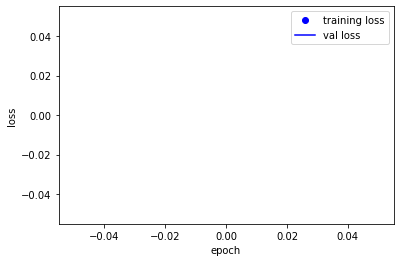

In [0]:
hist = history.history
loss= hist['loss']
val_loss = hist['val_loss']
eph = range(1,51)
plt.plot(eph,loss,'bo',label='training loss')
plt.plot(eph,val_loss,'b',label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [0]:
import xgboost as xgb

In [0]:
data_dmatrix = xgb.DMatrix(data = combine_new,label= d_label_code)
data_dmatrix.get_label()

array([ 1.,  2.,  1., ..., 11., 10.,  7.], dtype=float32)

In [0]:
xg_classifier = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree=0.3,learning_rate=0.1,\
                                  max_depth=5,alpha=10,n_estimators=500,metrics='merror')

xg_classifier.fit(X_train,Y_train,early_stopping_rounds=10,eval_set=[(X_valid,Y_valid)],verbose=100)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.495984
Will train until validation_0-merror hasn't improved in 10 rounds.
Stopping. Best iteration:
[34]	validation_0-merror:0.327309



XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              metrics='merror', min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
xg_classifier

In [0]:
pred = xg_classifier.predict(test_data_new)

In [0]:
pred_df =pd.DataFrame(pred,columns=['labelcode'])
pred_df


,labelcode
0,2
1,3
2,3
3,1
4,1
...,...
526,1
527,1
528,1
529,1


In [0]:
#pred_df['labelcode'].replace(l1,k1,inplace=True)
pred_df.tail(100)

,labelcode
431,la-nothing
432,la-object-switch-hands
433,la-nothing
434,la-object-pick
435,la-object-orient
...,...
526,la-nothing
527,la-nothing
528,la-nothing
529,la-nothing


In [0]:
#pred_df['label'] = pred_df['labelcode']
#pred_df = pred_df.drop(labels=['labelcode'],axis=1)
pred_df.to_csv("Ruru2.csv", encoding='utf-8', index=False)
pred_df

ERROR! Session/line number was not unique in database. History logging moved to new session 59


,subject,start_time,end_time,label
0,s06t01.la,0.0,0.5,la-object-pick
1,s06t01.la,0.5,1.0,la-object-switch-hands
2,s06t01.la,1.0,1.5,la-object-switch-hands
3,s06t01.la,1.5,2.0,la-nothing
4,s06t01.la,2.0,2.5,la-nothing
...,...,...,...,...
526,s06t01.la,263.0,263.5,la-nothing
527,s06t01.la,263.5,264.0,la-nothing
528,s06t01.la,264.0,264.5,la-nothing
529,s06t01.la,264.5,265.0,la-nothing


In [0]:
metrics.accuracy_score(label_dtest,pred_df)

0.7408536585365854

In [0]:
params = {'objective':'multi:softmax','colsample_bytree':0.3,'learning_rate':0.1,\
                                  'max_depth':5,'alpha':10,'num_class':13}

In [0]:
cv_result = xgb.cv(params=params,dtrain=data_dmatrix,nfold=5,num_boost_round=58,\
                   early_stopping_rounds=10,metrics='merror',as_pandas=True,seed=111)

In [0]:
cv_result.tail(5)

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
54,0.100347,0.002753,0.368518,0.017834
55,0.098843,0.003362,0.368982,0.017544
56,0.097338,0.002675,0.367593,0.016718
57,0.096065,0.003530,0.367593,0.017285
58,0.094213,0.003322,0.365741,0.017011


In [0]:
b_res = xgb.train(params=params,dtrain=data_dmatrix,num_boost_round=58)

In [0]:
b_result = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree=0.3,learning_rate=0.1,\
                                  max_depth=5,alpha=10,n_estimators=58)

In [0]:
b_result.fit(combine_new,d_label_code,verbose=100)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=58, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
new_pred = b_result.predict(test_data_new)

In [0]:
new_pred_df =pd.DataFrame(new_pred,columns=['labelcode'])

In [0]:
new_pred_df['labelcode'].replace(l1,k1,inplace=True)
new_pred_df.tail(50)

,labelcode
481,la-object-carry
482,la-object-switch-hands
483,la-object-switch-hands
484,la-nothing
485,la-nothing
486,la-object-switch-hands
487,la-nothing
488,la-nothing
489,la-nothing
490,la-nothing


In [0]:
#new_pred_df['label']= new_pred_df['labelcode']
#new_pred_df= new_pred_df.drop(labels=['labelcode'],axis=1)
new_pred_df.to_csv('Ruru3.csv',encoding='utf-8', index=False)

In [0]:
metrics.accuracy_score(label_dtest,new_pred_df)

0.6676829268292683

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm_classifier = LGBMClassifier(nthreads=3,n_estimators=500,objective= "multiclass",num_class = 13,boosting_type= "gbdt",\
                                 metric= 'multi_error',learning_rate=0.05,num_leaves=20,min_data_in_leaf = 200,colsample_bytree=.85,\
                                bagging_fraction=0.6,scale_pos_weight=1,subsample=.1,subsample_for_bin=2000,subsample_freq=2,\
                                 max_depth=7,max_bin=20,reg_alpha=2.7,reg_lambda=2.6,min_split_gain=.5,min_child_sample=220,\
                                 min_child_weight=2,silent=-1,verbose=10)

In [0]:
lgbm_classifier.fit(X_train,Y_train,early_stopping_rounds=20,eval_set=[(X_valid,Y_valid)],verbose=100)

Training until validation scores don't improve for 20 rounds.
[100]	valid_0's multi_error: 0.384259
Early stopping, best iteration is:
[105]	valid_0's multi_error: 0.37963


LGBMClassifier(bagging_fraction=0.6, boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.85, importance_type='split',
               learning_rate=0.05, max_bin=20, max_depth=7,
               metric='multi_error', min_child_sample=220, min_child_samples=20,
               min_child_weight=2, min_data_in_leaf=200, min_split_gain=0.5,
               n_estimators=500, n_jobs=-1, nthreads=3, num_class=13,
               num_leaves=20, objective='multiclass', random_state=None,
               reg_alpha=2.7, reg_lambda=2.6, scale_pos_weight=1, silent=-1,
               subsample=0.1, subsample_for_bin=2000, subsample_freq=2,
               verbose=10)